# PRODIGY_DS_04

## "Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands."

# Dataset

## Twitter Sentiment Analysis Dataset

# Overview

### "This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral."

In [24]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

 


ModuleNotFoundError: No module named 'wordcloud'

In [3]:
columns=['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv(r"C:\Users\Uday\OneDrive\Downloads\Prodigy_Infotech\task4\twitter_training.csv")

In [10]:
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Information about dataframe

In [12]:
df.shape

(74681, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Topic      74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
df.describe(include=object)

,Topic,Sentiment,Text
count,74681,74681,73995
unique,32,4,69488
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [16]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

# Checking null/missing values in the dataset

In [17]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

# Checking for duplicate values

In [20]:
df.duplicated().sum()

2341

In [21]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

# Visualization of count of different topics

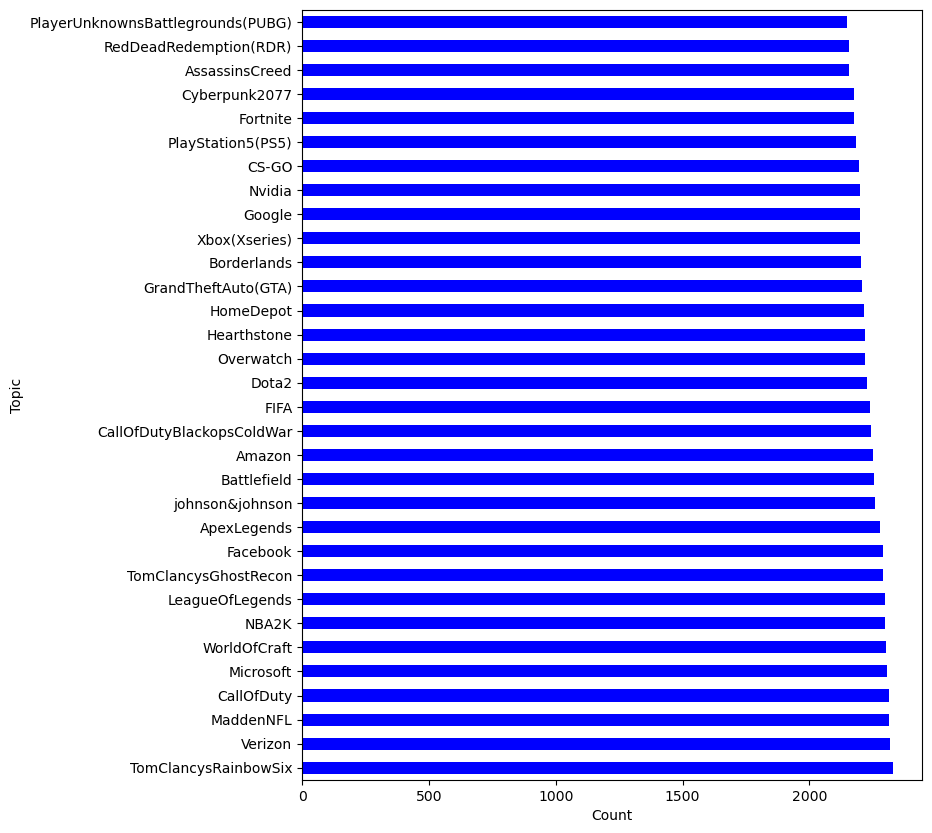

In [26]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh', color='b')
plt.xlabel("Count")
plt.show()

# Sentiment Distribution

<Axes: xlabel='Sentiment', ylabel='count'>

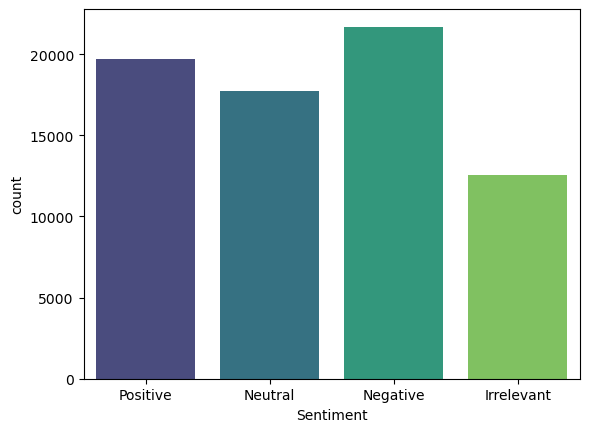

In [33]:
sns.countplot(x='Sentiment', data=df, palette='viridis', hue='Sentiment', legend=False)

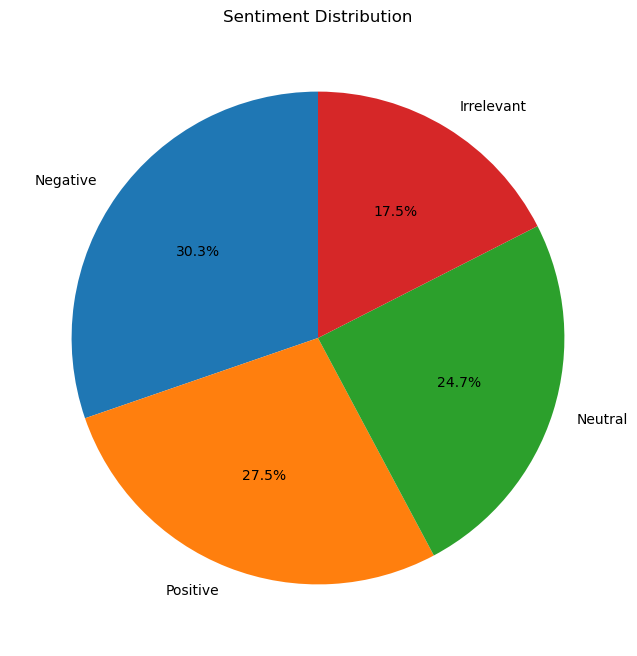

In [36]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# create the pie chart
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Sentiment Distribution')
plt.show()

# Observation:

      Most topic has negative sentiment.
      

# Sentiment Distribution Topic- Wise 

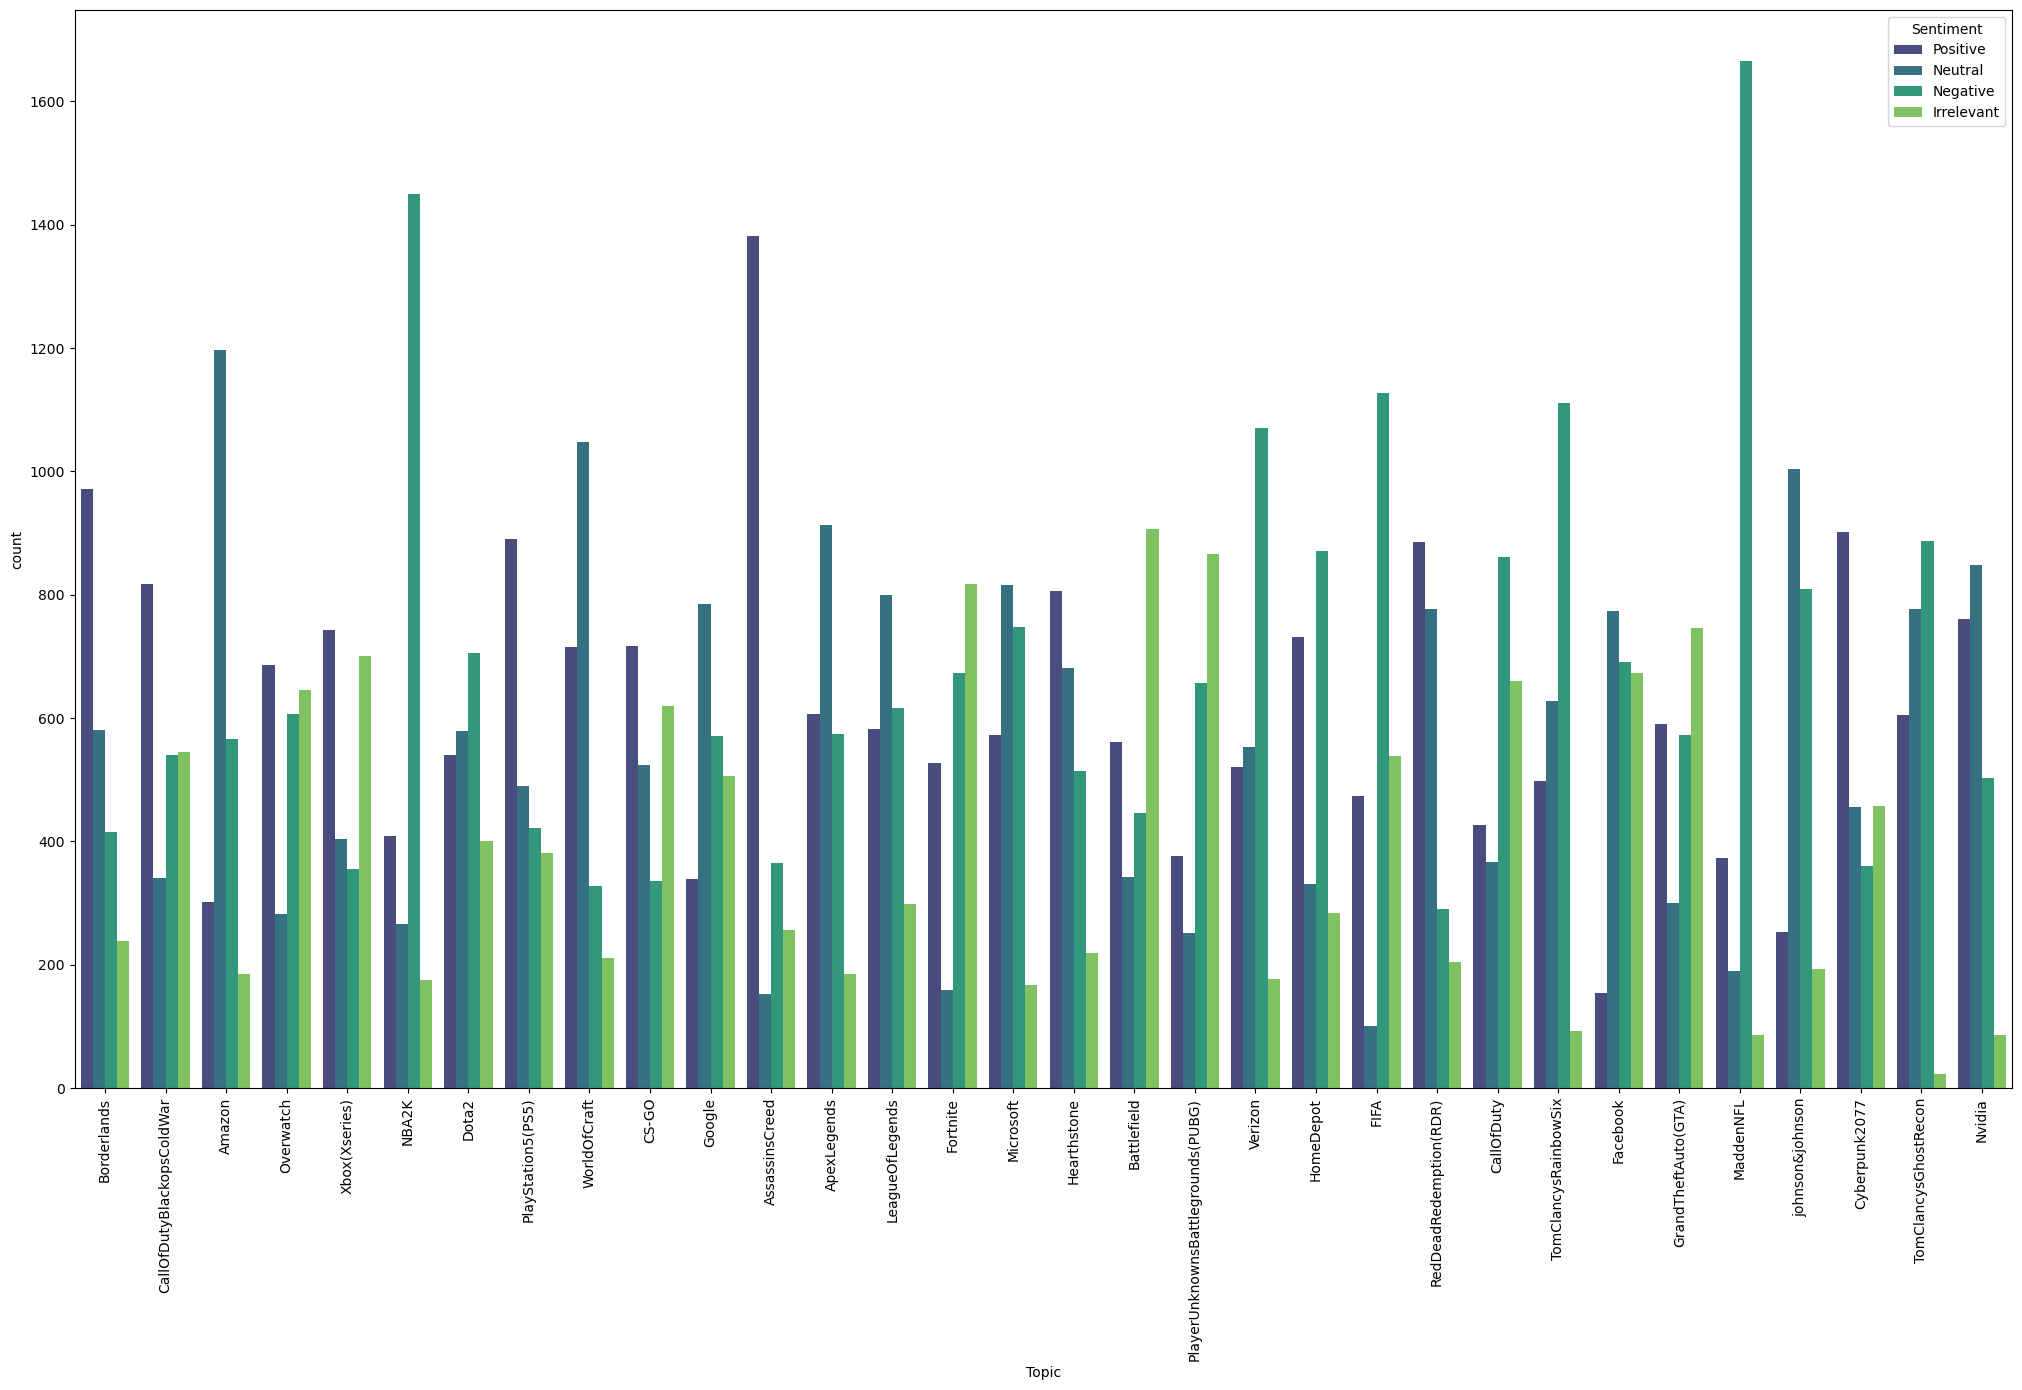

In [41]:
plt.figure(figsize=(25,14))
sns.countplot(x='Topic',data=df,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

# Top 5 Topics with Negative Sentiments

In [5]:
## Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

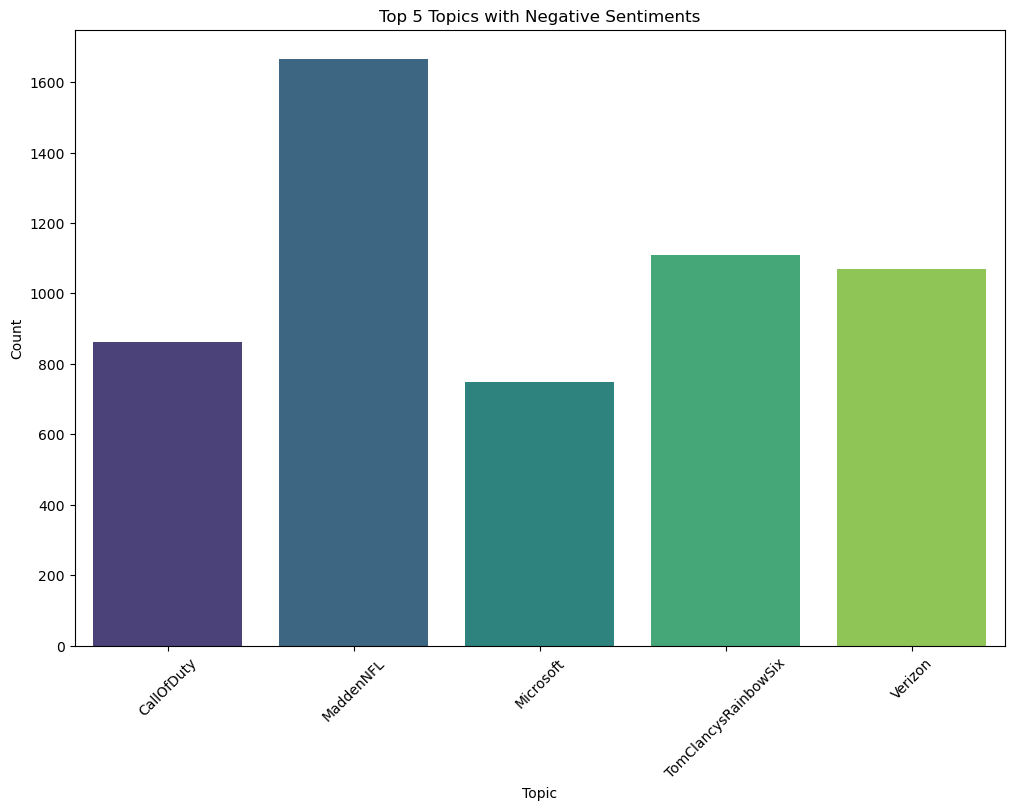

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], 
            x='Topic', y='Count', palette='viridis', hue='Topic', legend=False)

plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 5 Topics with Positive Sentiments

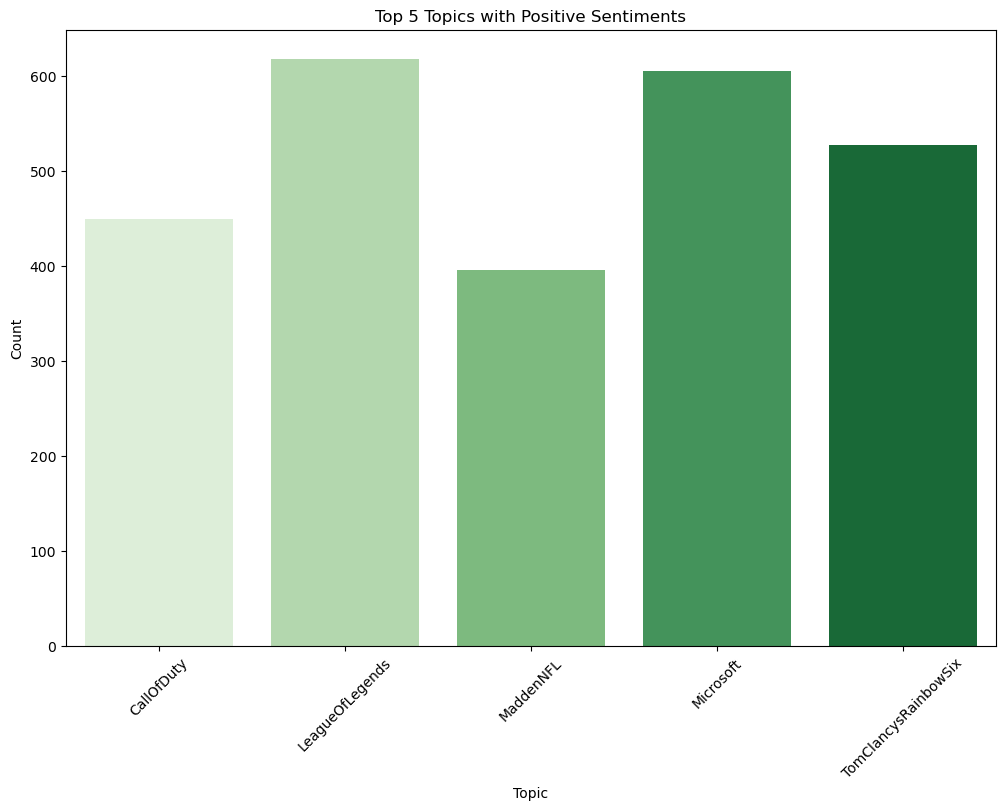

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], 
            x='Topic', y='Count', palette='Greens', hue='Topic', legend=False)
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Top 5 Topics with Neutral Sentiments

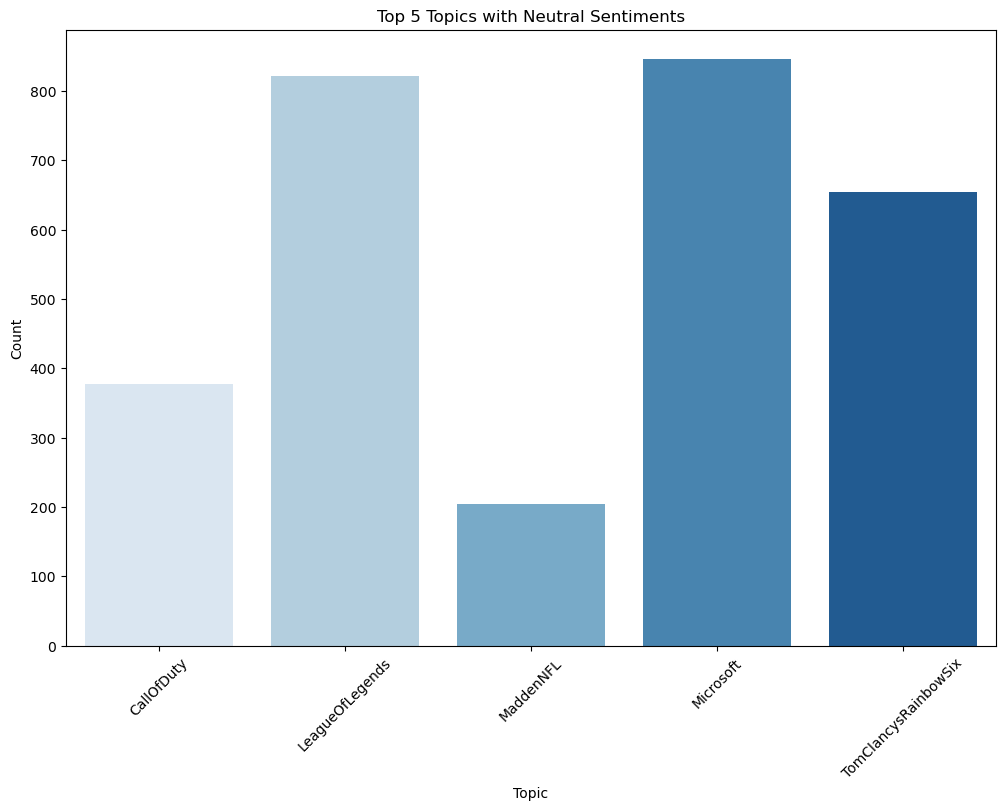

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], 
            x='Topic', y='Count', palette='Blues', hue='Topic', legend=False)
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 5 Topics with Irrelevant Sentiments

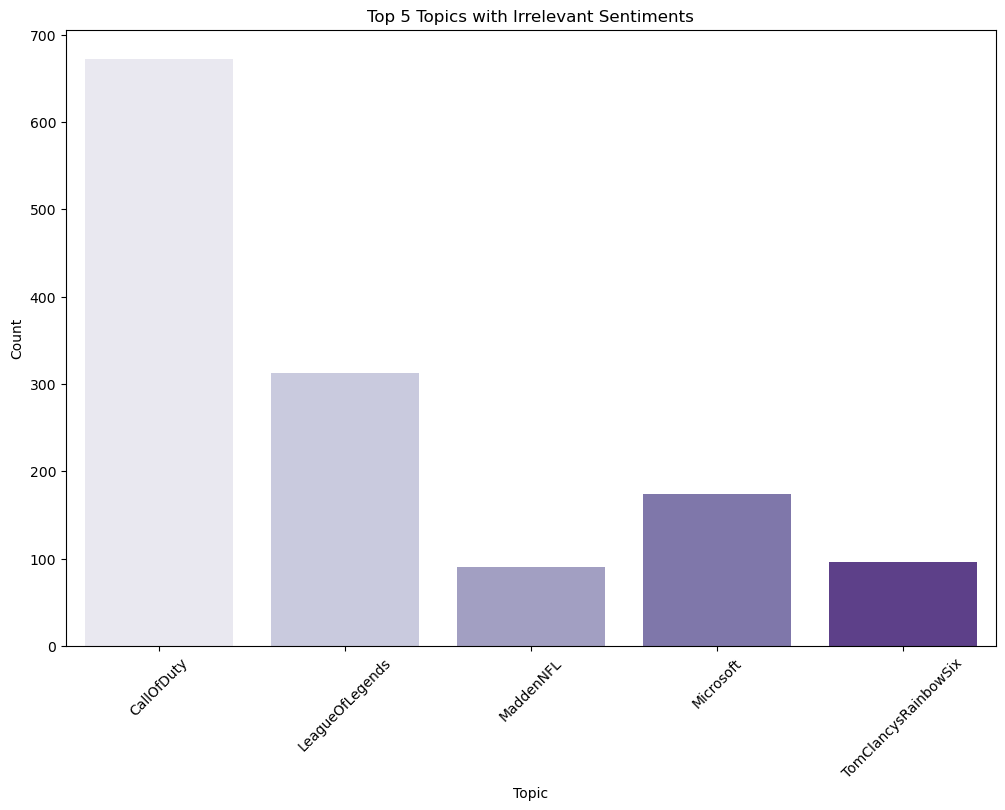

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], 
            x='Topic', y='Count', palette='Purples', hue='Topic', legend=False)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Sentiment Distribution in Google

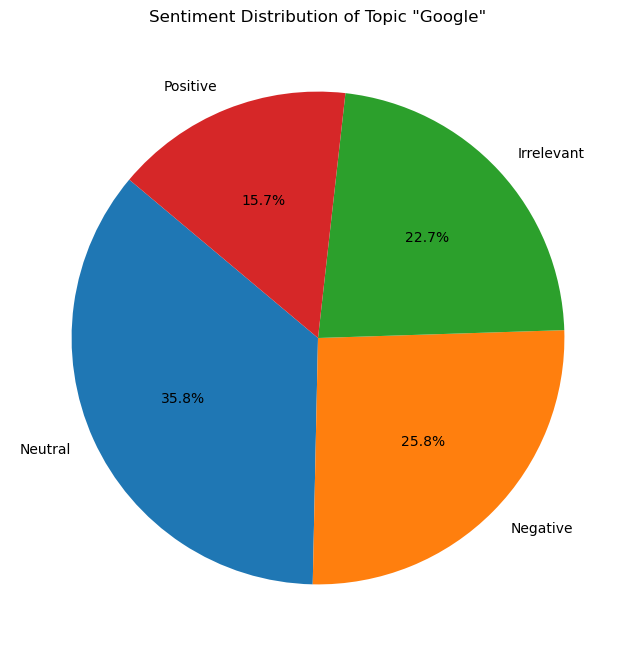

In [75]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

# Sentiment Distribution in Microsoft

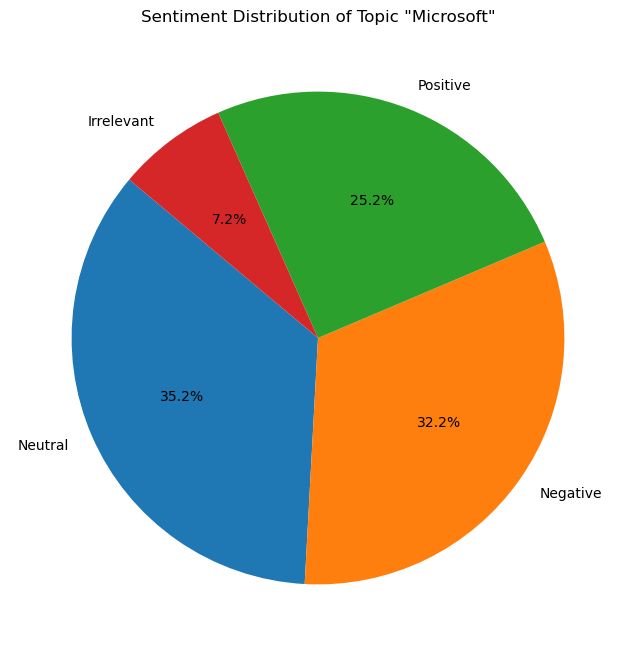

In [76]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = df[df['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [82]:

df['text'] = df['Text'].apply(len)


In [83]:
df

,ID,Topic,Sentiment,Text,msg_len,"(Text, msg_len)",text
0,2401,Borderlands,Positive,51,2,51,2
1,2401,Borderlands,Positive,50,2,50,2
2,2401,Borderlands,Positive,51,2,51,2
3,2401,Borderlands,Positive,57,2,57,2
4,2401,Borderlands,Positive,53,2,53,2
...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,128,3,128,3
74677,9200,Nvidia,Positive,117,3,117,3
74678,9200,Nvidia,Positive,125,3,125,3
74679,9200,Nvidia,Positive,159,3,159,3


# Plot of message length distribution for training data

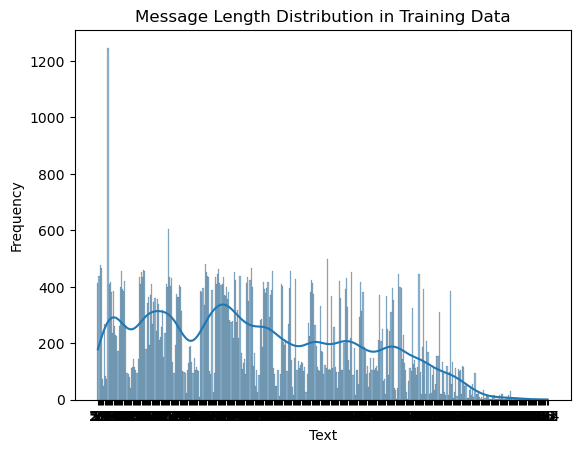

In [84]:
sns.histplot(df['Text'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Text')
plt.show()